In [20]:
import pandas as pd
import random

# Create a sample of the large dataset (5% of rows)
sample_size = 0.05  # Adjust this value as needed

# Method 1: Random sampling (if you can load the full file)
try:
    df = pd.read_csv('metadata.csv')
    sample_df = df.sample(frac=sample_size, random_state=42)
    sample_df.to_csv('metadata_sample.csv', index=False)
    
except MemoryError:
    # Method 2: Iterative sampling for very large files
    # Count total rows first (excluding header)
    with open('metadata.csv') as f:
        total_rows = sum(1 for line in f) - 1
    
    # Calculate number of rows to sample
    n_sample = int(total_rows * sample_size)
    
    # Randomly select row indices to keep
    skip_rows = sorted(random.sample(range(1, total_rows+1), total_rows - n_sample))
    
    # Read the sampled rows
    sample_df = pd.read_csv('metadata.csv', skiprows=skip_rows)
    sample_df.to_csv('metadata_sample.csv', index=False)

print(f"Created sample with {len(sample_df)} rows")

C:\Users\HP\AppData\Local\Temp\ipykernel_12824\4094729651.py:9: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('metadata.csv')


Created sample with 52833 rows


In [21]:
# Part 1: Data Loading and Basic Exploration

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sample data
df = pd.read_csv('metadata_sample.csv')

# Examine the first few rows
print("First 5 rows:")
print(df.head())

# Check DataFrame dimensions
print(f"\nDataset shape: {df.shape}")

# Check data types
print("\nData types:")
print(df.dtypes)

# Check for missing values in key columns
print("\nMissing values in key columns:")
key_columns = ['title', 'abstract', 'publish_time', 'authors', 'journal']
print(df[key_columns].isnull().sum())

# Basic statistics for numerical columns
print("\nBasic statistics:")
print(df.describe())


C:\Users\HP\AppData\Local\Temp\ipykernel_12824\443097188.py:8: DtypeWarning: Columns (6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('metadata_sample.csv')


First 5 rows:
   cord_uid                                       sha  source_x  \
0  ak20jg32  42a61efa32fae8fb14d1c8c1a8bc528c59e1583a       PMC   
1  d27cnei3                                       NaN  PMC; WHO   
2  7fo988o7                                       NaN       WHO   
3  vcz81w3o                                       NaN   Medline   
4  3ewr26np                                       NaN       PMC   

                                               title  \
0  Development and Internal Validation of a Novel...   
1  mRNA-1273: Acute disseminated encephalomyeliti...   
2  The Joint Commission should reconsider its pos...   
3  Flattening the Curve of Prostate Cancer Progre...   
4       Vincristine: Various toxicities: case report   

                            doi       pmcid   pubmed_id license  \
0     10.3389/fpsyt.2021.593710  PMC8172985    34093252   cc-by   
1    10.1007/s40278-021-06200-0  PMC8617002         NaN   no-cc   
2                           NaN         NaN  

In [22]:
# Part 2: Data Cleaning and Preparation

# Create a copy for cleaning
cleaned_df = df.copy()

# Convert publish_time to datetime, handling errors
cleaned_df['publish_time'] = pd.to_datetime(
    cleaned_df['publish_time'], errors='coerce'
)

# Extract year from publication date
cleaned_df['publication_year'] = cleaned_df['publish_time'].dt.year

# Handle missing values
# Drop rows with missing titles
cleaned_df = cleaned_df.dropna(subset=['title'])

# Fill missing abstracts with placeholder
cleaned_df['abstract'] = cleaned_df['abstract'].fillna('No abstract available')

# Create abstract word count column
cleaned_df['abstract_word_count'] = cleaned_df['abstract'].apply(
    lambda x: len(str(x).split())
)

# Verify the cleaning
print(f"Cleaned dataset shape: {cleaned_df.shape}")
print("\nMissing values after cleaning:")
print(cleaned_df[key_columns].isnull().sum())

Cleaned dataset shape: (52814, 21)

Missing values after cleaning:
title               0
abstract            0
publish_time    26905
authors          1167
journal          4424
dtype: int64


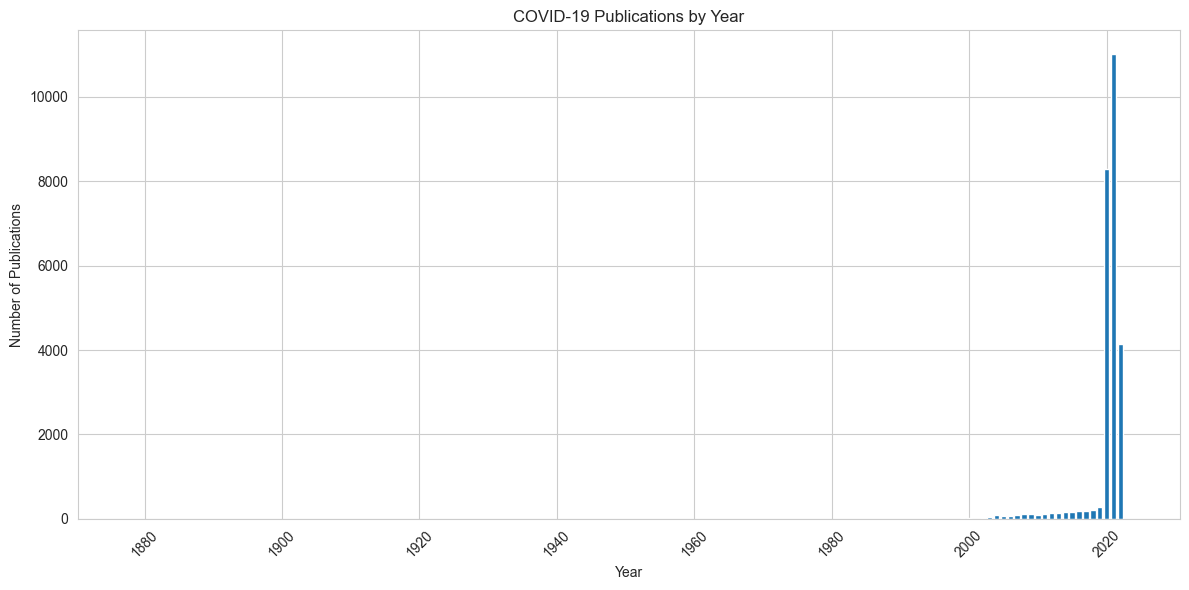

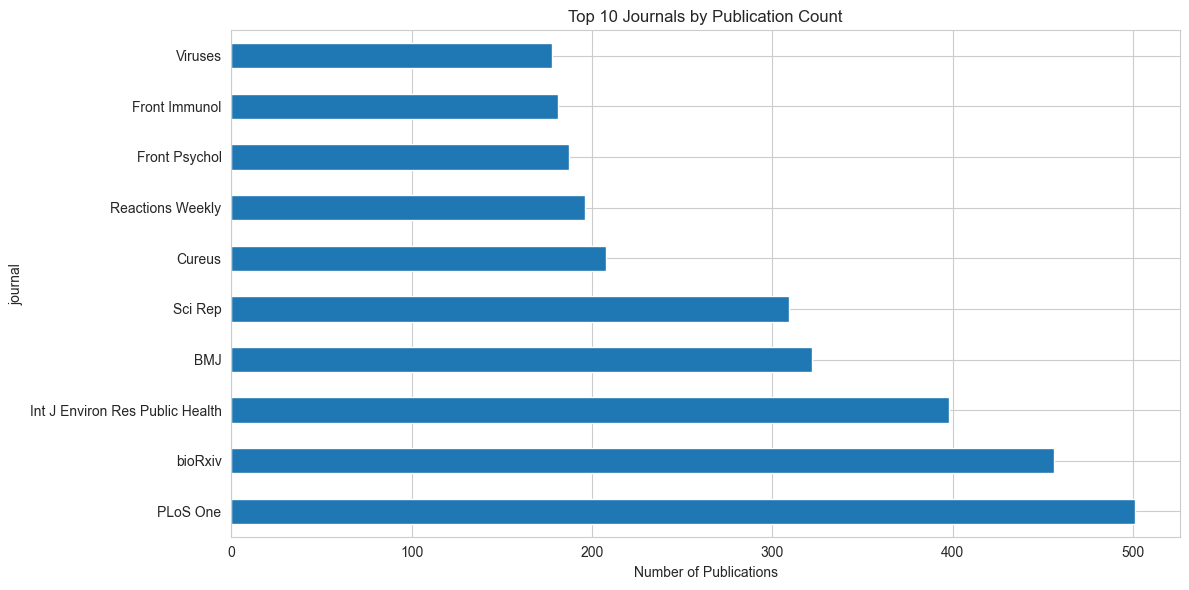

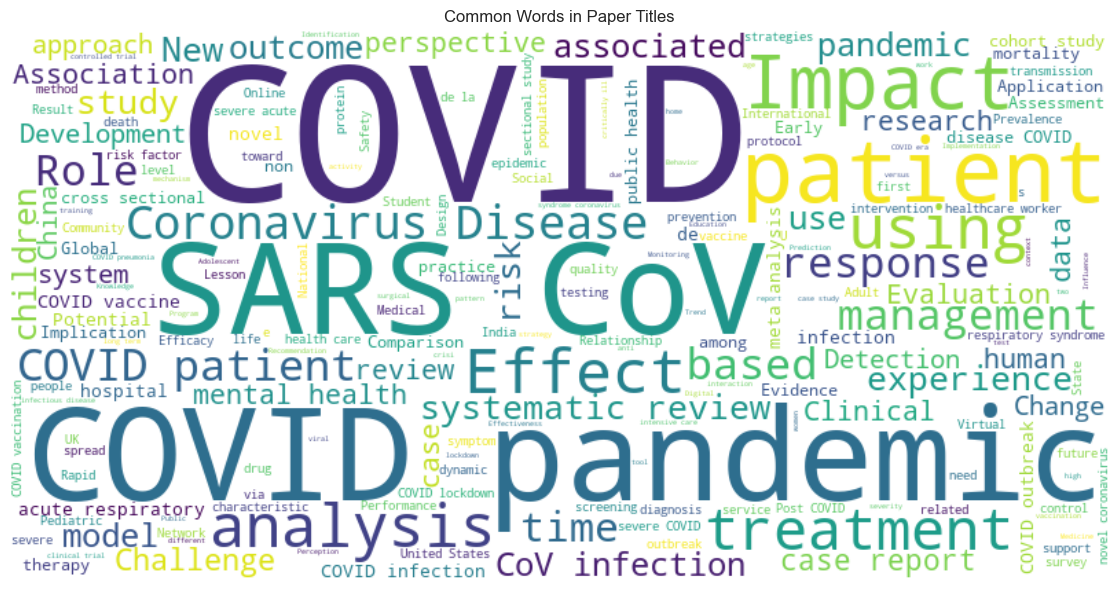

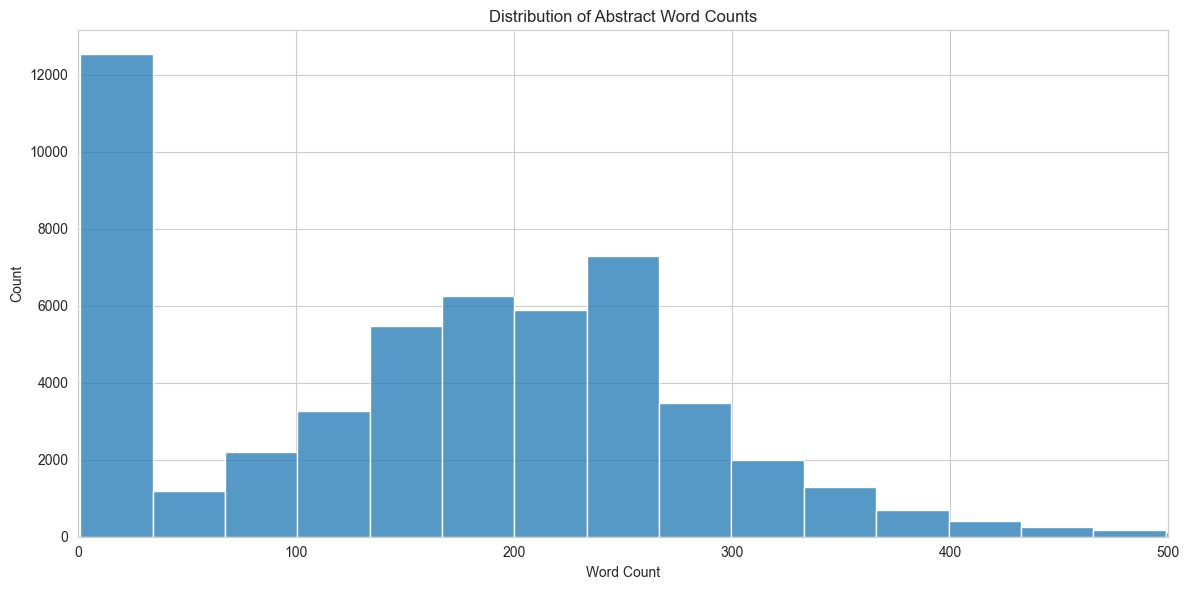

In [23]:
# Part 3: Data Analysis and Visualization

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set style for plots
sns.set_style("whitegrid")

# 1. Publications by year
yearly_counts = cleaned_df['publication_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(yearly_counts.index, yearly_counts.values)
plt.title('COVID-19 Publications by Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top journals
top_journals = cleaned_df['journal'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_journals.plot(kind='barh')
plt.title('Top 10 Journals by Publication Count')
plt.xlabel('Number of Publications')
plt.tight_layout()
plt.show()

# 3. Word cloud of titles
all_titles = ' '.join(cleaned_df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Paper Titles')
plt.tight_layout()
plt.show()

# 4. Distribution of abstract word counts
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_df['abstract_word_count'], bins=50)
plt.title('Distribution of Abstract Word Counts')
plt.xlabel('Word Count')
plt.xlim(0, 500)  # Limit x-axis to exclude extreme outliers
plt.tight_layout()
plt.show()

In [ ]:
# create and save the cleaned data

# Run this code first to create the cleaned data file
import pandas as pd
import random

# Create a sample of the large dataset
sample_size = 0.05  # 5% sample

# Read the full file and create a sample
df = pd.read_csv('metadata.csv')
sample_df = df.sample(frac=sample_size, random_state=42)

# Clean the sample data
cleaned_df = sample_df.copy()
cleaned_df['publish_time'] = pd.to_datetime(cleaned_df['publish_time'], errors='coerce')
cleaned_df['publication_year'] = cleaned_df['publish_time'].dt.year
cleaned_df = cleaned_df.dropna(subset=['title'])
cleaned_df['abstract'] = cleaned_df['abstract'].fillna('No abstract available')
cleaned_df['abstract_word_count'] = cleaned_df['abstract'].apply(lambda x: len(str(x).split()))

# Save the cleaned data
cleaned_df.to_csv('cleaned_metadata_sample.csv', index=False)
print("Cleaned data saved successfully!")